# 9장. 텍스트를 분류합니다

In [44]:
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [30]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

In [31]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [32]:
word_to_index = imdb.get_word_index()

word_to_index['movie']

17

In [33]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [34]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [35]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [36]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [37]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [38]:

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [39]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [40]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [41]:
x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [42]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [43]:
print(x_train_onehot.nbytes)

800000000


## 09-3 텐서플로로 순환 신경망을 만듭니다

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

RNN을 먼저 거치게하고 Dense를 다음에 가도록 만든다.  
마지막 타임스텝의 은닉상태 h만 다음으로 전달 되므로 32가 출력되는 차원이다.
파라미터가 4256개인 이유는 입력은 원핫인코딩된 100차원 벡터이고 셀개수가 32이므로  
$W_{1x}$ 행렬요소는 $100 x 32$이다. $W_{1h}$ 행렬의 요소개수도 $32 x 32$가 된다. 마지막으로 셀마다 하나씩 총 32개의 절편이 있다.



In [63]:
(32*100)+(32*32) +32

4256

In [61]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
# 원핫벡터 100차원, 단어개수 100개라서 input(100,100)
# 뉴런의 개수 32는 출력되는 차원을 말한다 

model.add(Dense(1, activation='sigmoid'))
# 이진분류모델(긍정 or 부정)이므로 1개의 유닛을 갖고 sigmoid 활성화함수

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_val_onehot, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 14s 723us/sample - loss: 0.7038 - accuracy: 0.5133 - val_loss: 0.6917 - val_accuracy: 0.5396
Epoch 2/20
20000/20000 [==============================] - 14s 676us/sample - loss: 0.6809 - accuracy: 0.5681 - val_loss: 0.6618 - val_accuracy: 0.6062
Epoch 3/20
20000/20000 [==============================] - 14s 678us/sample - loss: 0.6732 - accuracy: 0.5846 - val_loss: 0.6841 - val_accuracy: 0.5526
Epoch 4/20
20000/20000 [==============================] - 14s 679us/sample - loss: 0.6644 - accuracy: 0.6021 - val_loss: 0.6890 - val_accuracy: 0.5346
Epoch 5/20
20000/20000 [==============================] - 14s 686us/sample - loss: 0.6477 - accuracy: 0.6273 - val_loss: 0.7028 - val_accuracy: 0.5898
Epoch 6/20
20000/20000 [==============================] - 14s 684us/sample - loss: 0.6225 - accuracy: 0.6604 - val_loss: 0.6017 - val_accuracy: 0.6806
Epoch 7/20
20000/20000 [=====================

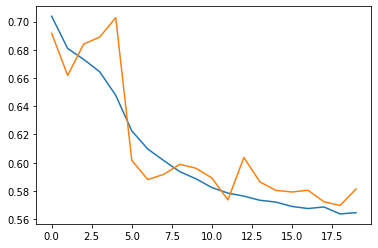

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

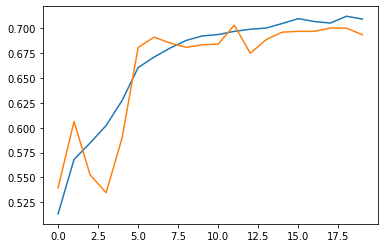

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [51]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.6934


### 워드 임베딩층으로 순환 신경망의 성능 높여보자
- 앞에서 짰던 순환신경망의 단점은 텍스트 데이터를 원핫인코딩으로 전처리했다. 
원핫인코딩의 단점은 입력데이터의 크기와 사용할 수 있는 단어가 제한된다는 점이다.또한 원핫인코딩은 단어 사이의 유사성을 표현하지 못한다. 또한 공간 낭비가 된다.(해당하는 단어만 1 아닌 것은 0이므로 매트릭스의 대부분이 0)
- 지금 보려는 워드임베딩은 이런 단점을 해결하기 위해서 고안되었다. 그림처럼 단어를 고정된 길이의 실수벡터로 임베딩 해낸다.
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/09_1.JPG?raw=true)

[word2vec](http://w.elnn.kr/search/) 사이트에 들어가서 단어 벡터간의 유사도를 보자.  


여자-여왕+왕 = 남자  
개그맨-유재석+아이유 = 가수  
유재석-개그맨+가수 = 김경호(?)  
일본-우동+불고기 = 한국  
우동-일본+한국 = 짜장  

In [52]:
from tensorflow.keras.layers import Embedding

In [53]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [54]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [55]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32)) 
# 1000개의 단어를 써보자! 아까보다 10배, 
# 그러나 임베딩 차원이 32이므로 파라미터가 32000으로 전의 모델보다 
# 효율적으로 학습할수 있다.
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 756us/sample - loss: 0.6410 - accuracy: 0.6095 - val_loss: 0.5077 - val_accuracy: 0.7600
Epoch 2/10
20000/20000 [==============================] - 14s 683us/sample - loss: 0.4648 - accuracy: 0.7928 - val_loss: 0.4613 - val_accuracy: 0.7944
Epoch 3/10
20000/20000 [==============================] - 13s 635us/sample - loss: 0.4045 - accuracy: 0.8272 - val_loss: 0.4249 - val_accuracy: 0.8086
Epoch 4/10
20000/20000 [==============================] - 12s 606us/sample - loss: 0.3670 - accuracy: 0.8474 - val_loss: 0.4502 - val_accuracy: 0.7968
Epoch 5/10
20000/20000 [==============================] - 12s 616us/sample - loss: 0.3414 - accuracy: 0.8597 - val_loss: 0.4548 - val_accuracy: 0.8030
Epoch 6/10
20000/20000 [==============================] - 12s 601us/sample - loss: 0.3247 - accuracy: 0.8682 - val_loss: 0.4506 - val_accuracy: 0.8124
Epoch 7/10
20000/20000 [=====================

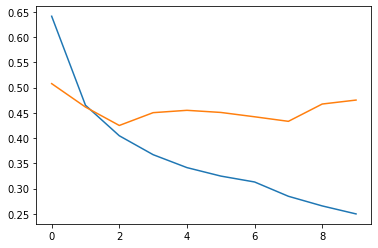

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

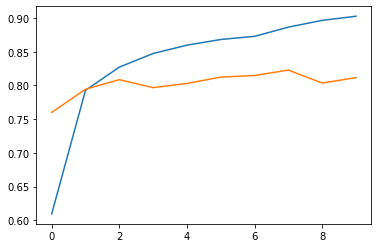

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [59]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8116
